# Part A: Stock Futures  Data Analysis

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importing-Libraries" data-toc-modified-id="Importing-Libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Importing Libraries</a></span></li><li><span><a href="#Loading-Dataset" data-toc-modified-id="Loading-Dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Loading Dataset</a></span></li><li><span><a href="#Data-Pre-processing" data-toc-modified-id="Data-Pre-processing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Pre-processing</a></span></li><li><span><a href="#Total-Open-Interest-Long" data-toc-modified-id="Total-Open-Interest-Long-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Total Open Interest Long</a></span><ul class="toc-item"><li><span><a href="#Seasonal-Decomposition-Using-Statsmodel" data-toc-modified-id="Seasonal-Decomposition-Using-Statsmodel-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Seasonal Decomposition Using Statsmodel</a></span></li><li><span><a href="#Checking-for-stationarity-of-residuals" data-toc-modified-id="Checking-for-stationarity-of-residuals-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Checking for stationarity of residuals</a></span></li><li><span><a href="#Forecasting-Using-ARIMA-Model" data-toc-modified-id="Forecasting-Using-ARIMA-Model-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Forecasting Using ARIMA Model</a></span></li><li><span><a href="#Validating-Forecasts" data-toc-modified-id="Validating-Forecasts-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Validating Forecasts</a></span></li></ul></li><li><span><a href="#Difference-of-Commercial-Long-&amp;-Short" data-toc-modified-id="Difference-of-Commercial-Long-&amp;-Short-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Difference of Commercial Long &amp; Short</a></span><ul class="toc-item"><li><span><a href="#Seasonal-Decomposition-Using-Statsmodel" data-toc-modified-id="Seasonal-Decomposition-Using-Statsmodel-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Seasonal Decomposition Using Statsmodel</a></span></li><li><span><a href="#Seasonality-Component-Analysis" data-toc-modified-id="Seasonality-Component-Analysis-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Seasonality Component Analysis</a></span></li></ul></li></ul></div>

## Importing Libraries

In [371]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import itertools

import warnings
warnings.filterwarnings('ignore')

## Loading Dataset

__Reding CSV file:__

In [372]:
df = pd.read_csv('/Users/chaudhary/Downloads/data1.csv')
df.head()

,ReportDate,ReleaseDate,Commercial Long,Commercial Short,Non Commercial Long,Non Commercial Short,Non Reportable Long,Non Reportable Short,Spreader Long,Spreader Short,Total Open Interest Long,Total Open Interest Short
0,19980106,19980109,1365090,1362720,93770,111765,437355,421730,1395,1395,1897610,1897610
1,19980113,19980116,1415160,1392391,85096,125822,484348,466390,4740,4740,1989344,1989343
2,19980120,19980123,1429665,1441004,95450,113592,470500,441018,3435,3435,1999050,1999049
3,19980127,19980130,1430065,1435068,96107,128786,492177,454494,1145,1145,2019494,2019493
4,19980203,19980206,1408685,1442938,117148,119870,527987,491011,5570,5570,2059390,2059389


__Converting 'ReportDate' Column to appropriate date format:__

In [374]:
df['ReportDate'] = pd.to_datetime(df['ReportDate'], format = "%Y%m%d").dt.strftime('%Y-%m-%d') 

In [375]:
type(df.ReportDate[0])

str

In [376]:
# Convert 'Date' column values to datetime data type
df.ReportDate = pd.to_datetime(df.ReportDate)

In [377]:
type(df.ReportDate[0])

pandas._libs.tslibs.timestamps.Timestamp

In [378]:
df['Total Open Interest Long_Scaled'] = df['Total Open Interest Long']/1000000

__Checking for any null values:__

In [379]:
df.isnull().sum()

ReportDate                         0
ReleaseDate                        0
Commercial Long                    0
Commercial Short                   0
Non Commercial Long                0
Non Commercial Short               0
Non Reportable Long                0
Non Reportable Short               0
Spreader Long                      0
Spreader Short                     0
Total Open Interest Long           0
Total Open Interest Short          0
Total Open Interest Long_Scaled    0
dtype: int64

## Data Pre-processing

__Resampling Dataframe Based on Month__

In [394]:
df_resampled_monthly = df.resample('M', on='ReportDate').mean()

In [395]:
df_resampled_monthly['Year'] = df_resampled_monthly.index.year
df_resampled_monthly['Month'] = df_resampled_monthly.index.month

In [396]:
df_resampled_monthly['commercial_long_short_diff'] = (df_resampled_monthly['Commercial Long']-df_resampled_monthly['Commercial Short'])/1000000

In [382]:
df['commercial_long_short_diff'] = (df['Commercial Long']-df['Commercial Short'])/1000000

In [276]:
# Setting the date as index of the above dataframe

df.set_index('ReportDate', inplace = True)

## Total Open Interest Long

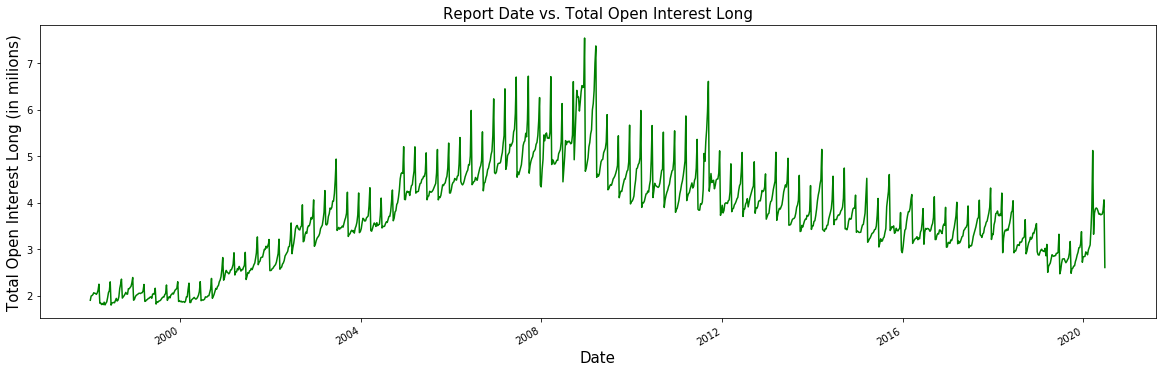

In [277]:
(df['Total Open Interest Long_Scaled']).plot(figsize = (20,6),c='g')
plt.title('Report Date vs. Total Open Interest Long',size=15)
plt.xlabel('Date',size=15)
plt.ylabel('Total Open Interest Long (in milions)',size=15)
plt.savefig('PA_1.jpg', dpi=250)
plt.show()

### Seasonal Decomposition Using Statsmodel

In [285]:
python_decomposition = sm.tsa.seasonal_decompose(df['Total Open Interest Long_Scaled'],period=52)

In [286]:
def plot_seasonal_decomposition(axs, series, sd):
    axs[0].plot(series.index, series,c='k')
    axs[0].set_title("Raw Series")
    axs[1].plot(series.index, sd.trend,c='r')
    axs[1].set_title("Trend Component $T_t$")
    axs[2].plot(series.index, sd.seasonal,c='g')
    axs[2].set_title("Seasonal Component $S_t$")
    axs[3].plot(series.index, sd.resid,c='b')
    axs[3].set_title("Residual Component $R_t$")

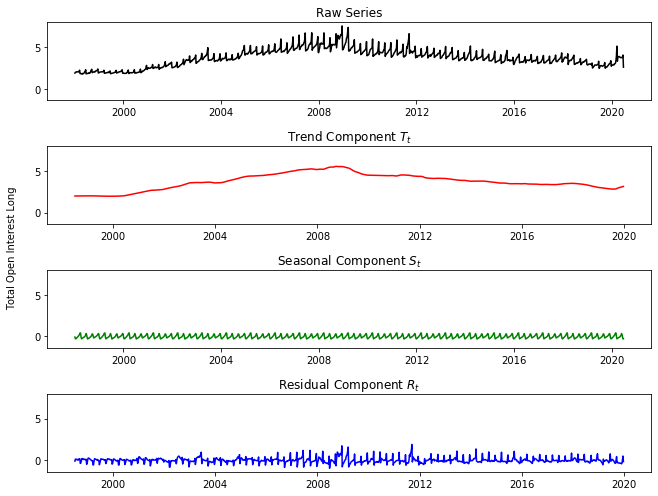

In [287]:
fig, axs = plt.subplots(4, figsize=(9, 7),sharey=True)
plot_seasonal_decomposition(axs, df['Total Open Interest Long_Scaled'], python_decomposition)
fig.text(-0.01, 0.5, 'Total Open Interest Long', va='center', rotation='vertical')
plt.tight_layout()
plt.savefig('PA_2.jpg',dpi=200)

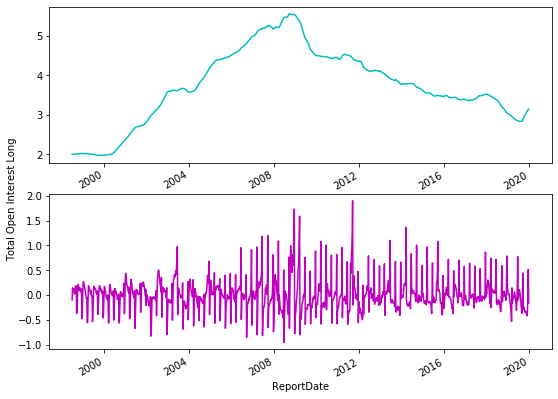

In [288]:
fig, (ax1,ax2) = plt.subplots(2,1, figsize=(9,7))
result.trend.plot(ax=ax1,c='c')
result.resid.plot(ax=ax2,c='m')
fig.text(0.06,0.5,'Total Open Interest Long', va='center', rotation='vertical')
plt.savefig('PA_3.jpg',dpi=200)

### Checking for stationarity of residuals

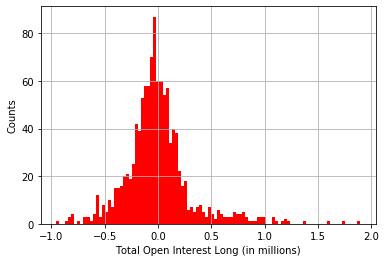

In [289]:
result.resid.hist(bins=100,color='r',grid=True)
plt.xlabel('Total Open Interest Long (in millions)')
plt.ylabel('Counts')
plt.savefig('PA_5.jpg',dpi=200)

### Forecasting Using ARIMA Model

In [290]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df['Total Open Interest Long_Scaled'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
        except:
            continue

In [291]:
mod = sm.tsa.statespace.SARIMAX(df['Total Open Interest Long_Scaled'],
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()

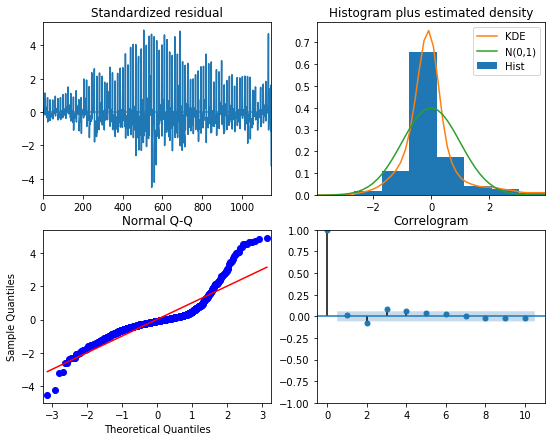

In [292]:
results.plot_diagnostics(figsize=(9, 7))
plt.savefig('PA_4.jpg',dpi=200)
plt.show()

### Validating Forecasts

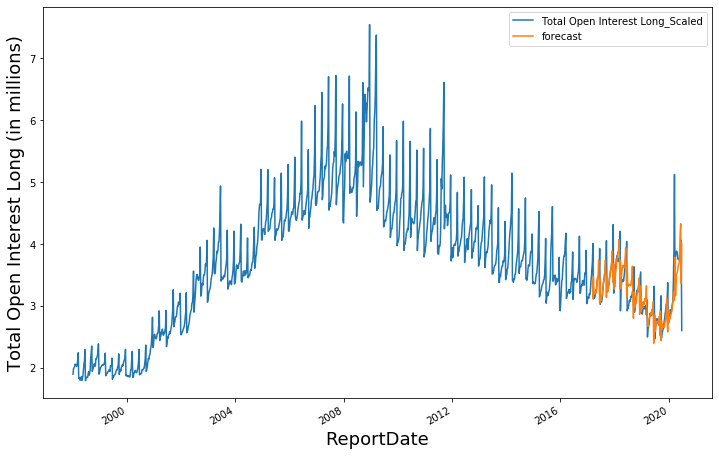

In [333]:
df['forecast'] = results.predict(start = 1000, end= 1172)  
df[:][['Total Open Interest Long_Scaled', 'forecast']].plot(figsize=(12,8))
plt.xlabel('ReportDate',fontsize=18)
plt.ylabel('Total Open Interest Long (in millions)',fontsize=18)
plt.savefig('PA_6.jpg',dpi=200)

## Difference of Commercial Long & Short

### Seasonal Decomposition Using Statsmodel

In [347]:
python_decomposition_new = sm.tsa.seasonal_decompose(df['commercial_long_short_diff'],period=52)

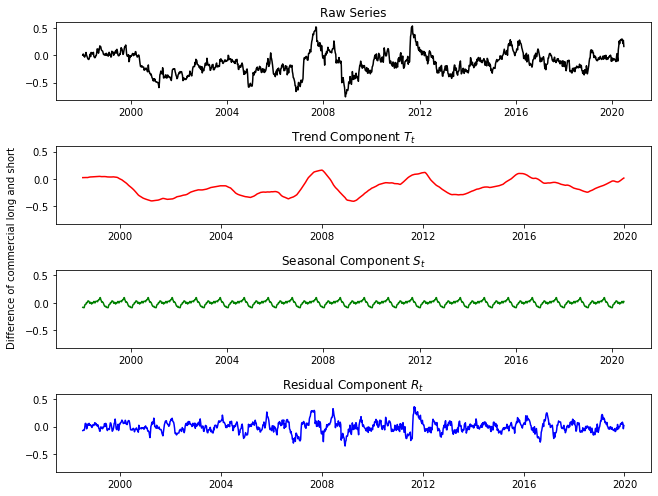

In [350]:
fig, axs = plt.subplots(4, figsize=(9, 7),sharey=True)
plot_seasonal_decomposition(axs, df['commercial_long_short_diff'], python_decomposition_new)
fig.text(-0.01, 0.5, 'Difference of commercial long and short', va='center', rotation='vertical')
plt.savefig('PA_7.jpg',dpi=200)
plt.tight_layout()

### Seasonality Component Analysis

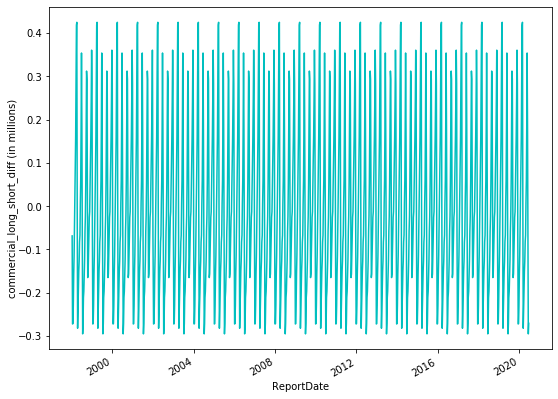

In [393]:
fig, (ax1) = plt.subplots(1,1, figsize=(9,7))
result.seasonal.plot(ax=ax1,c='c')
fig.text(0.06,0.5,'commercial_long_short_diff (in millions)', va='center', rotation='vertical')
plt.savefig('PA_8.jpg',dpi=200)

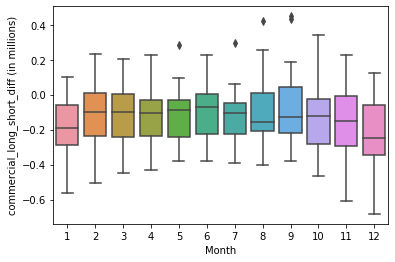

In [397]:
sns.boxplot(data=df_resampled_monthly, x='Month', y=df_resampled_monthly['commercial_long_short_diff'])
plt.ylabel('commercial_long_short_diff (in millions)')
plt.savefig('PA_9.jpg',dpi=200)

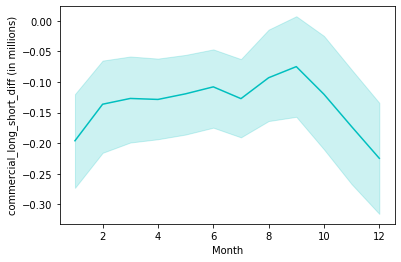

In [401]:
sns.lineplot(data=df_resampled_monthly, x='Month', y=df_resampled_monthly['commercial_long_short_diff'],color='c')
plt.ylabel('commercial_long_short_diff (in millions)')

plt.savefig('PA_10.jpg',dpi=200)

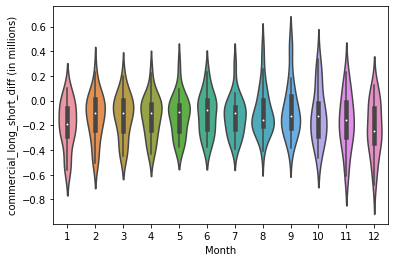

In [402]:
sns.violinplot(data=df_resampled_monthly, x='Month', y=df_resampled_monthly['commercial_long_short_diff'])
plt.ylabel('commercial_long_short_diff (in millions)')
plt.savefig('PA_11.jpg',dpi=200)